The point of this notebook: to demonstrate how one can use GPy to predict a 2D
function of a 1D input.

In [2]:
import numpy as np
import pylab as pb
import GPy

pb.ion()

In [3]:
X = np.linspace(0.05,0.95,10)[:,None]
Y = -np.cos(np.pi*X) +np.sin(4*np.pi*X) + np.random.randn(10,1)*0.05

In [8]:
doubleY = np.hstack((Y, -Y))

In [16]:
print(X.shape)
print(doubleY.shape)

(10, 1)
(10, 2)


In [10]:
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X,doubleY,k)

{'dataplot': [<matplotlib.collections.PathCollection at 0x7fa9fe67fee0>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x7fa9fd511a60>,
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7fa9fd511f10>,
  <matplotlib.collections.PolyCollection at 0x7fa9fd07d2b0>]}

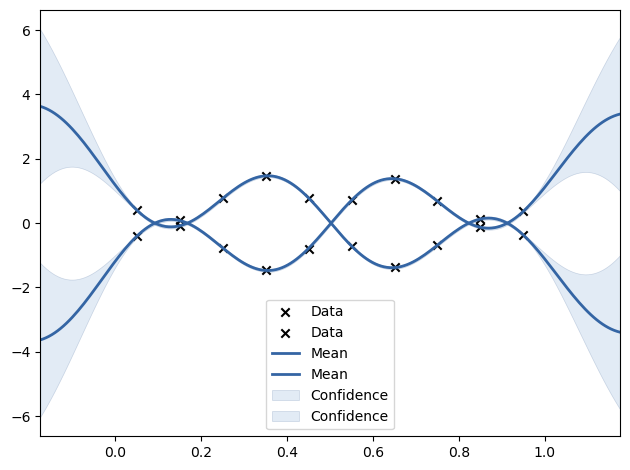

In [11]:
m.constrain_positive('') # '' is a regex matching all parameter names
m.optimize()
m.plot()

In [12]:
x = np.array([np.array([0.4])])
x

array([[0.4]])

In [13]:
m.predict(x)

(array([[-1.30972236,  1.30972236]]), array([[0.000449]]))

In [23]:
X

array([[0.05],
       [0.15],
       [0.25],
       [0.35],
       [0.45],
       [0.55],
       [0.65],
       [0.75],
       [0.85],
       [0.95]])

In [28]:
m.predict(X)

(array([[-0.44461535],
        [ 0.01773381],
        [-0.72250031],
        [-1.41297431],
        [-0.77280558],
        [ 0.70717991],
        [ 1.50425714],
        [ 0.70917967],
        [ 0.0192352 ],
        [ 0.36268245]]),
 array([[3.40944510e-08],
        [3.40944364e-08],
        [3.40944144e-08],
        [3.40943949e-08],
        [3.40943840e-08],
        [3.40943840e-08],
        [3.40943949e-08],
        [3.40944142e-08],
        [3.40944362e-08],
        [3.40944504e-08]]))

array([[0.4]])